In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
files = os.listdir('Data')
print(files)

['Average spectra.txt', 'DA.txt', 'EPC-prediction.txt', 'HC-prediction.txt', 'Loading.txt', 'PCA1.txt', 'PCA2.txt', 'PCA3.txt', 'Publication.pdf', 'Raman shift.txt', 'Raw-CD18.txt', 'Raw-EPC.txt', 'Raw-EPC2.txt', 'Raw-GN.txt', 'Raw-HC.txt', 'Raw-HC2.txt', 'Raw-HPDE.txt', 'Raw-MiaPaCa.txt', 'Scaled CD18.txt', 'Scaled GN.txt', 'Scaled HPDE.txt', 'Scaled MiaPaCa.txt']


In [35]:
df_average = pd.read_csv(r'Data\Average spectra.txt',sep='\t',header=[0,1])

In [36]:
df_average.head()

,Unnamed: 0_level_0,Mean,Standard Deviation,Mean,Standard Deviation,Mean,Standard Deviation,Mean,Standard Deviation
,Unnamed: 0_level_1,Statistics On Rows of [Book9]H-HPDE!Col(B):Col(C34),Statistics On Rows of [Book9]H-HPDE!Col(B):Col(C34),Statistics On Rows of [Book1]H-CD18!Col(B):Col(C32),Statistics On Rows of [Book1]H-CD18!Col(B):Col(C32),Statistics On Rows of [Book2]H-MiaPaCa!Col(A1):Col(A31),Statistics On Rows of [Book2]H-MiaPaCa!Col(A1):Col(A31),Statistics On Rows of [Book8]H-GN!Col(B):Col(W),Statistics On Rows of [Book8]H-GN!Col(B):Col(W)
0,719.421,1.963618,1.243561,2.089354,1.986297,1.009154,1.718254,1.569937,1.113830
1,720.629,1.889719,1.202215,2.004456,1.919989,0.950310,1.691151,1.485904,1.096629
2,721.838,1.854428,1.155707,1.955802,1.877348,0.902877,1.648838,1.415847,1.076157
3,723.046,1.793777,1.122544,1.928820,1.853950,0.878549,1.622505,1.323568,1.041825
4,724.253,1.746564,1.094122,1.866089,1.827821,0.844380,1.596352,1.222392,0.991328


In [37]:
df_average.shape

(1014, 9)

In [38]:
columns=[('Raman','Frequency'),
         ('Mean','HPDE'),('Standard Deviation','HPDE'),
         ('Mean','CD'),('Standard Deviation','CD'),
         ('Mean','MiaPaCa'),('Standard Deviation','MiaPaCa'),
        ('Mean','GN'),('Standard Deviation','GN')]
df_average.columns = pd.MultiIndex.from_tuples(columns)
df_average.head()

,Raman,Mean,Standard Deviation,Mean,Standard Deviation,Mean,Standard Deviation,Mean,Standard Deviation
,Frequency,HPDE,HPDE,CD,CD,MiaPaCa,MiaPaCa,GN,GN
0,719.421,1.963618,1.243561,2.089354,1.986297,1.009154,1.718254,1.569937,1.113830
1,720.629,1.889719,1.202215,2.004456,1.919989,0.950310,1.691151,1.485904,1.096629
2,721.838,1.854428,1.155707,1.955802,1.877348,0.902877,1.648838,1.415847,1.076157
3,723.046,1.793777,1.122544,1.928820,1.853950,0.878549,1.622505,1.323568,1.041825
4,724.253,1.746564,1.094122,1.866089,1.827821,0.844380,1.596352,1.222392,0.991328


In [39]:
df_average.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (Raman, Frequency)             1014 non-null   float64
 1   (Mean, HPDE)                   1014 non-null   float64
 2   (Standard Deviation, HPDE)     1014 non-null   float64
 3   (Mean, CD)                     1014 non-null   float64
 4   (Standard Deviation, CD)       1014 non-null   float64
 5   (Mean, MiaPaCa)                1014 non-null   float64
 6   (Standard Deviation, MiaPaCa)  1014 non-null   float64
 7   (Mean, GN)                     1014 non-null   float64
 8   (Standard Deviation, GN)       1014 non-null   float64
dtypes: float64(9)
memory usage: 71.4 KB


<Axes: >

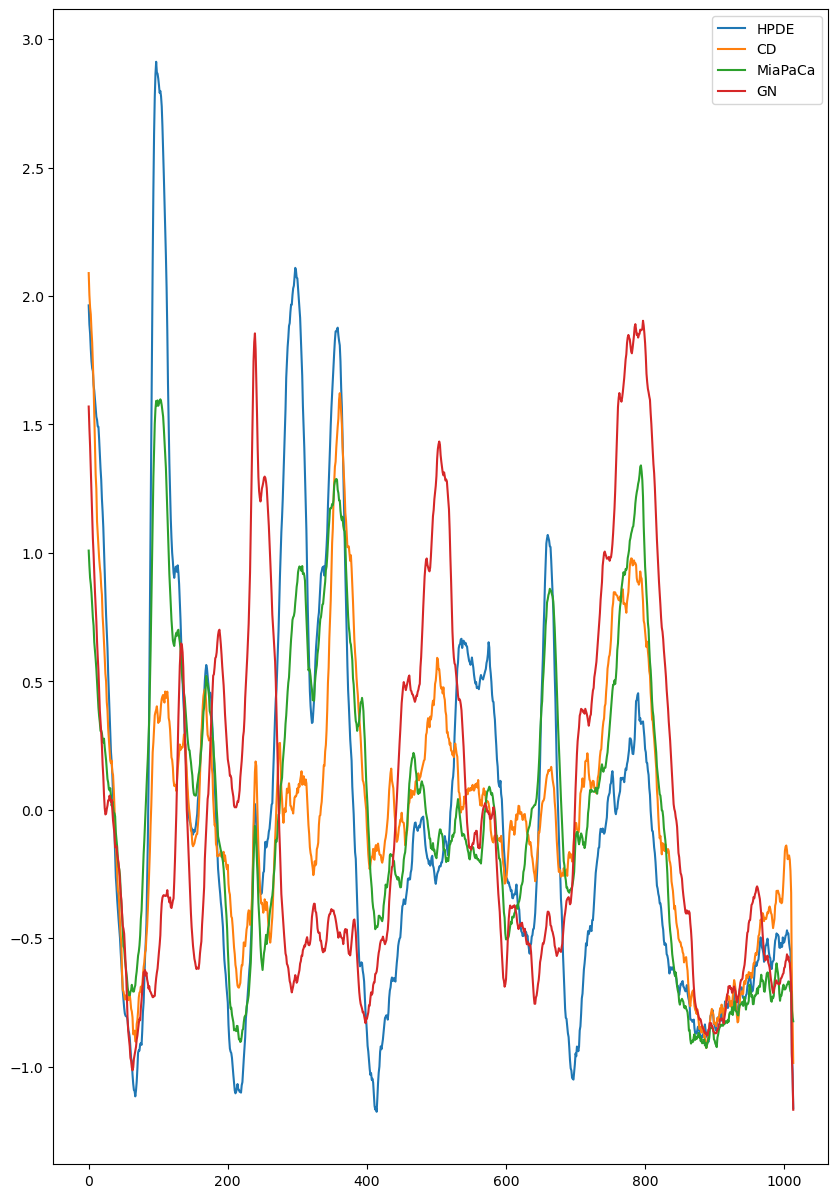

In [40]:
df_average.Mean.plot()

Of course, this is spectroscopic data, which means that x-axis will be in frequency (cm$^{-1}$).

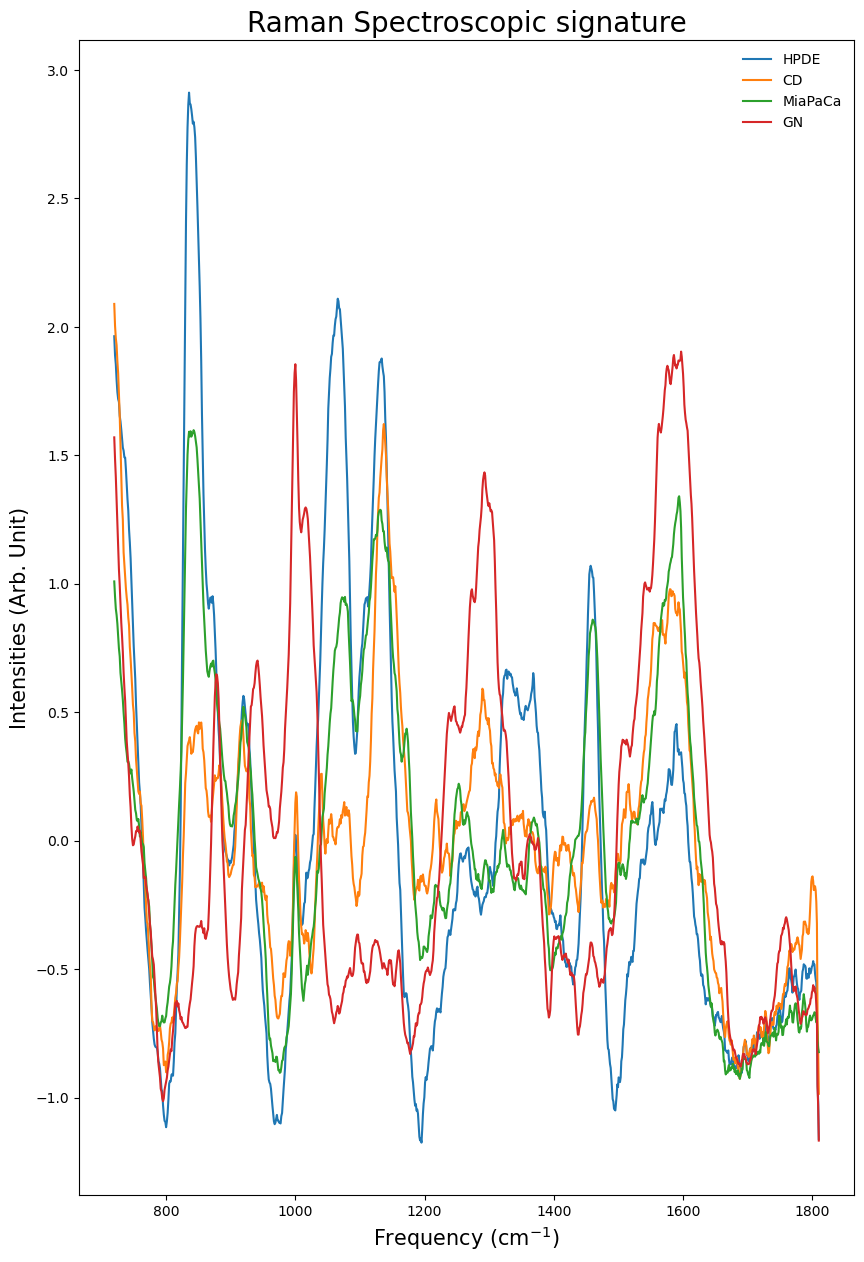

In [41]:
pd.option_context('mode.use_inf_as_na', True)
plt.title('Raman Spectroscopic signature', fontsize = 20)
plt.plot(df_average.Raman.Frequency,df_average.Mean.HPDE,label='HPDE')
plt.plot(df_average.Raman.Frequency,df_average.Mean.CD,label='CD')
plt.plot(df_average.Raman.Frequency,df_average.Mean.MiaPaCa,label='MiaPaCa')
plt.plot(df_average.Raman.Frequency,df_average.Mean.GN,label='GN')
plt.xlabel(r'Frequency (cm$^{-1}$)',fontsize=15)
plt.ylabel(r'Intensities (Arb. Unit)',fontsize=15)
plt.legend(frameon=False)
plt.show()

Another way to visualize the spectroscopic response for each "Things".

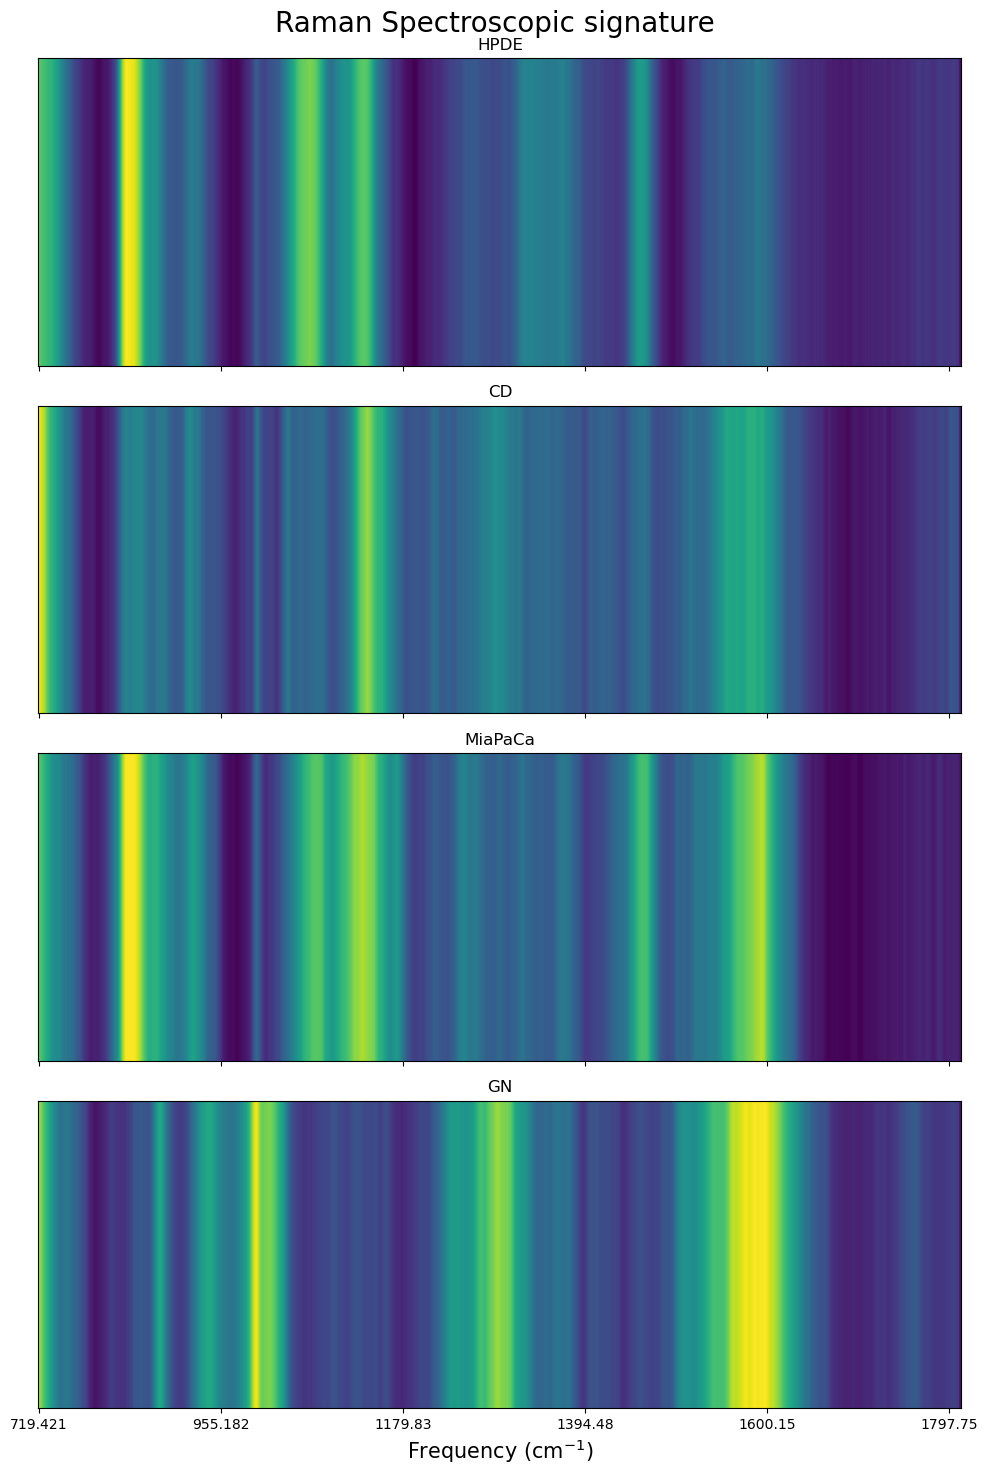

In [44]:
fig, ax = plt.subplots(4,1,sharex=True,sharey=True)
fig.suptitle('Raman Spectroscopic signature', fontsize = 20)
ax[0].imshow([df_average.Mean.HPDE], aspect="auto")
ax[1].imshow([df_average.Mean.CD], aspect="auto")
ax[2].imshow([df_average.Mean.MiaPaCa], aspect="auto")
ax[3].imshow([df_average.Mean.GN], aspect="auto")
ax[0].set_title('HPDE')
ax[1].set_title('CD')
ax[2].set_title('MiaPaCa')
ax[3].set_title('GN')
plt.yticks([])
plt.xticks(np.arange(0, 1013, 200),df_average.Raman.Frequency[::200])
plt.xlabel(r'Frequency (cm$^{-1}$)',fontsize=15)
plt.tight_layout()
'''
for i in range(4):
    ax[i].axvline(x=300, ymin=0.0, ymax=1.0, color='r', linestyle='--', alpha=1)
    ax[i].axvline(x=100, ymin=0.0, ymax=1.0, color='r', linestyle='--', alpha=1)
'''
plt.show()

In [45]:
df_raw_HPDE = pd.read_csv(r'Data\Raw-HPDE.txt',sep='\t',header=None)

In [46]:
df_raw_HPDE.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,609.927974,516.114881,754.661668,705.967703,656.738695,632.528348,772.015465,422.591102,765.996989,602.369577,...,483.311159,705.507262,1094.091623,558.716439,629.404883,335.447784,541.850423,648.142592,591.169453,500.048021
1,577.079988,499.306887,741.311767,693.952930,651.909844,622.103451,757.722958,412.738901,740.978701,567.555935,...,452.666774,653.969568,1056.672170,527.188433,625.360328,340.207145,561.789190,618.756330,583.428277,470.389714
2,567.509144,494.778295,719.593730,685.773103,620.875998,593.277308,731.967210,411.354746,721.044885,555.519644,...,459.459738,657.261168,1051.190851,514.644116,630.355072,322.441626,626.401793,622.671054,590.548488,461.038391
3,556.111118,489.338721,702.361336,647.813375,603.297393,564.967912,701.938234,408.748626,723.977596,521.221900,...,419.189169,619.732035,1046.468581,514.961627,614.845027,315.562896,674.224044,604.256185,593.518858,407.134380
4,519.609050,484.045332,672.881351,625.759229,563.098662,549.233632,695.287774,406.290715,703.507303,491.233679,...,397.359816,574.102433,1035.141097,542.418861,596.166903,284.773470,675.428521,611.291960,614.497281,404.700299


In [47]:
df_raw_HPDE.shape

(1014, 35)

In [48]:
df_raw_CD = pd.read_csv(r'Data\Raw-CD18.txt',sep='\t',header=None)

In [49]:
df_raw_CD.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,462.250553,-88.956977,12211.075787,138.476666,722.523025,790.705515,16833.155629,482.846254,924.675995,18.519408,...,682.997381,4134.879267,721.836516,570.964342,11876.248771,428.721259,1390.759272,14686.044405,348.268072,636.765977
1,436.982475,-84.542468,10383.473577,139.684022,657.891275,779.193184,17778.051350,411.258819,917.786714,-34.277209,...,698.004300,4108.956426,663.477808,565.805419,11187.847228,427.103716,1534.804320,15007.618378,303.723261,624.358963
2,418.922427,-39.028311,8976.035486,136.195751,628.512955,748.924845,18697.846470,379.465945,924.332020,-40.762669,...,713.090873,4115.688617,630.933029,558.807819,10571.188859,416.175049,1666.264862,15376.107605,248.493055,598.615002
3,424.457974,-10.446520,6262.718792,146.769691,596.923084,741.777124,20269.935530,367.395086,881.996792,-87.290297,...,710.063955,4136.342320,618.125645,552.979513,9670.870581,418.423881,1886.847811,16164.213116,213.520312,576.200426
4,422.589851,4.341221,4232.948800,140.303686,578.548094,701.832739,21081.587106,303.697568,865.527296,-81.014289,...,711.436156,4166.678987,603.947787,533.675528,8967.153636,421.664330,1940.952292,16767.097985,157.238793,551.541815


In [50]:
df_raw_CD.shape

(1014, 33)

In [51]:
df_frequency = pd.read_csv(r'Data\Raman shift.txt',sep='\t',header=None)

In [52]:
df_frequency.head()

,0,1
0,719.421,NaN
1,720.629,NaN
2,721.838,NaN
3,723.046,NaN
4,724.253,NaN


In [53]:
df_frequency[1].isna().sum()

1014

In [54]:
df_frequency.drop(columns=1,axis=1,inplace=True)

In [55]:
df_frequency.head()

,0
0,719.421
1,720.629
2,721.838
3,723.046
4,724.253


In [56]:
df_frequency.column = 'Frequency'

In [57]:
df_raw_EPC = pd.read_csv(r'Data\Raw-EPC.txt',sep='\s+',header=None)

In [58]:
df_raw_EPC.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,3203.163535,6320.974384,6887.646015,-467.071908,309.968360,23964.023828,4914.055589,2071.515841,7798.466443,927.605080,...,17106.364263,3213.326052,2235.211800,1647.692268,17618.585039,2041.744264,2277.645859,-1456.801366,13727.676672,-1119.050078
1,3103.180691,6321.751083,6161.643276,-653.364664,352.574265,23180.087714,4665.178293,2089.593892,7536.362115,1031.550350,...,16108.988438,3196.324199,2227.484274,1640.470158,17481.837070,2059.917444,2196.018035,-1353.687698,14036.332729,-1209.851583
2,2986.780580,6283.240725,5535.486579,-630.492983,392.886723,22482.484591,4311.171479,2064.169876,7288.770278,1110.889652,...,15021.524728,3191.308086,2219.452056,1628.435502,17402.646657,2050.200713,2114.993612,-1254.919115,14203.433016,-1466.771130
3,2933.909809,6313.348074,5646.613963,-800.367063,466.192310,21778.753585,4068.409457,2068.370215,7058.793922,1297.059204,...,14279.604815,3162.814938,2218.215596,1642.432518,17757.111924,2050.864642,2044.587138,-1162.628716,14727.702996,-1761.390038
4,2959.257669,6328.991128,6306.360640,-567.606996,475.672052,21194.492801,3748.711404,2084.700672,6776.520803,1518.303385,...,13523.335750,3248.812738,2205.956784,1703.840559,18033.226992,2093.804655,1969.941371,-977.857172,15065.059637,-1891.941108


In [59]:
df_raw_EPC.shape

(1013, 55)

In [60]:
df_raw_EPC2 = pd.read_csv(r'Data\Raw-EPC2.txt',sep='\s+',header=None)

In [61]:
df_raw_EPC2.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,581.899206,-168.985577,-179.710030,-182.049615,2377.232531,1439.513142,56368.903752,-128.628921,8664.769405,1302.905387,...,-1026.891116,2108.599522,836.056391,2369.803079,-184.149094,-149.793292,977.776456,15002.007838,-5.647692,820.770585
1,613.983272,-110.185162,-116.774939,-166.981462,2326.903225,1456.938548,54562.986421,-126.600008,8460.275539,1316.941872,...,-979.478719,2103.956206,809.058785,2606.446663,-129.519384,-99.907468,967.913236,13520.234276,25.535020,863.304970
2,599.851085,-77.109569,-93.205683,-145.640647,2205.992330,1463.733499,52244.328672,-138.971015,8157.918141,1280.981950,...,-1005.070031,2167.187996,814.162470,2759.642151,-95.634574,-72.685480,981.259543,12134.442636,60.758067,896.288231
3,593.456322,-38.334370,-70.958203,-142.017365,2147.541559,1488.171605,48137.172235,-195.685023,7783.453295,1277.575975,...,-1024.451703,2220.851608,855.599036,3196.568610,-62.872740,-28.588225,991.496365,10738.174535,273.647065,993.025950
4,594.775348,7.628597,-28.362549,-71.620603,2058.137154,1506.016144,42947.097344,-263.929965,7364.941814,1266.669817,...,-972.301724,2341.520915,850.865488,3743.599119,-23.792392,17.693773,1031.349264,9166.361870,379.826107,1087.840792


In [62]:
df_raw_EPC2.shape

(1013, 120)

In [63]:
df_raw_GN = pd.read_csv(r'Data\Raw-GN.txt',sep='\s+',header=None)

In [64]:
df_raw_GN.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2160.348717,1314.579420,3218.265846,2351.634956,1718.374803,1054.734117,1495.768736,1687.681208,838.412255,1455.511128,...,1189.056338,655.610102,1195.173062,1364.227497,1059.646051,734.268796,2769.263332,3124.997898,1711.264905,1680.924476
1,2045.885705,1297.393931,3195.264459,2272.111147,1695.248236,1085.340363,1431.383846,1603.925439,761.849748,1374.513051,...,1061.548439,616.494438,1206.968712,1189.309195,1067.676532,721.596722,2642.759384,3006.950948,1668.187469,1613.478943
2,1989.764491,1252.535351,3138.935280,2239.438805,1672.247913,1093.915553,1406.870278,1557.384257,705.467276,1367.470748,...,970.183124,596.253803,1184.270459,1107.595288,1019.047836,680.217221,2543.644357,2925.022553,1586.802863,1572.875803
3,1951.439372,1232.810425,3011.697036,2220.894062,1628.383404,1159.616311,1353.378038,1502.961437,649.927359,1267.311728,...,851.921660,573.872773,1131.874819,953.322572,992.805555,646.171478,2456.899857,2838.141830,1506.328355,1478.687291
4,1897.763294,1183.869128,2876.850879,2193.998714,1506.630255,1158.025564,1308.014322,1467.167992,566.581489,1144.444349,...,748.880127,592.389565,1055.854998,844.907811,966.076031,634.805981,2336.305663,2731.480400,1497.707680,1394.192856


In [65]:
df_raw_GN.shape

(1014, 22)

In [66]:
df_raw_HC = pd.read_csv(r'Data\Raw-HC.txt',sep='\s+',header=None)

In [67]:
df_raw_HC.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,664.066369,891.519617,-55.185891,789.077141,756.648636,575.395903,812.793173,631.869852,3377.424394,1225.919616,...,29.214720,5741.079109,-4075.177635,-962.449543,46085.982967,16994.411469,-52.107264,-1290.924259,-1161.970246,20166.640066
1,727.637950,938.968041,-20.001006,784.202377,811.105970,620.008865,837.406006,635.436913,3626.686697,1233.630143,...,67.675125,5845.833450,-2910.158181,-920.334063,44825.210704,16971.574966,36.375592,-1183.832011,-1075.916837,18732.060172
2,719.349410,943.849373,1.420800,777.689599,789.311420,625.776152,863.507211,649.299885,3937.332330,1242.919809,...,92.551005,5930.309376,-2014.917612,-890.593846,43538.695113,16681.662158,77.638293,-1108.209207,-1039.534287,17364.742541
3,771.963997,975.847488,40.013175,826.842720,816.972423,689.352168,876.225500,661.545420,4395.367705,1238.143204,...,126.703477,6084.008584,-462.622593,-903.940795,42375.339802,16546.408443,79.839218,-818.619517,-908.831754,14780.186982
4,812.518125,1027.312499,74.733424,810.081306,847.967557,699.872646,887.305153,679.512831,4807.660441,1252.448052,...,154.074688,6256.793708,325.072843,-866.324594,41136.213330,15818.275651,173.226593,-518.478614,-770.107138,12482.214654


In [68]:
df_raw_HC.shape

(1013, 60)

In [69]:
df_raw_HC2 = pd.read_csv(r'Data\Raw-HC2.txt',sep='\s+',header=None)

In [70]:
df_raw_HC2.head()

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,1008.600674,-176.331239,-248.210781,-211.621177,-152.701312,-163.797481,114.916213,-26.551247,-204.156848,-922.529271,...,-118.983831,-785.670250,-442.223228,-565.895180,11899.686997,-1466.700795,40.748809,-78.988593,-821.789023,872.508664
1,1046.371463,-147.584618,-200.509401,-156.480285,-126.970755,-126.804979,226.510538,48.387896,-145.021424,-887.725883,...,-296.501999,-549.425264,-479.016974,-495.175035,11579.851837,-1202.731401,87.915315,-60.076447,-941.850909,866.826500
2,978.631157,-112.422007,-158.221211,-116.235692,-94.430349,-59.928333,298.777360,88.365984,-111.003317,-883.415887,...,-504.824634,-362.698155,-513.150226,-435.747824,11314.132757,-971.307879,105.810732,-29.435275,-1017.920529,915.228065
3,814.376885,-63.540342,-94.486609,-60.710620,-87.698196,-7.100967,394.487054,146.945886,-61.440373,-836.645116,...,-684.975727,-55.706231,-535.935830,-359.469506,11176.782171,-626.442796,155.594252,3.855931,-1183.958936,920.117639
4,704.080718,-19.986074,-54.767168,-13.401172,-47.806272,45.427068,450.609431,182.098345,-8.919438,-776.367364,...,-659.530411,143.510836,-486.122782,-270.028946,11164.175387,-329.362564,145.734191,53.843324,-1262.201270,872.797323


In [71]:
df_raw_HC2.shape

(1013, 110)

In [72]:
df_raw_MiaPaCa = pd.read_csv(r'Data\Raw-MiaPaCa.txt',sep='\s+',header=None)

In [73]:
df_raw_MiaPaCa.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,986.134289,3191.825457,-2.535792,381.293306,-14.670542,222.150897,283.214723,-10.688220,4014.044286,1567.222465,...,28581.246327,319.677679,755.957734,8008.400770,550.821570,475.220347,424.548050,183.399571,49.565123,291.349689
1,968.238898,2387.663019,-13.405950,323.864640,-13.062933,221.195522,274.867820,-6.973148,3329.342639,1497.822661,...,27494.121593,314.584347,706.747435,7704.657802,543.220942,475.095789,401.035342,165.500022,55.983494,298.719220
2,940.958141,2042.282002,-4.439658,283.158469,18.430079,212.515654,304.850952,0.275607,2779.738368,1405.961540,...,26730.718074,306.062605,687.922333,7546.049323,546.734571,457.565767,394.257941,153.319906,51.380073,301.287580
3,931.451280,1140.520027,16.551258,240.507895,72.736326,195.481008,391.133158,26.687282,2049.528623,1295.990866,...,26154.070758,306.240677,665.283137,7362.425379,527.072509,452.180077,386.850138,161.356251,29.136447,302.037695
4,897.871235,957.922213,8.585703,220.874240,103.296138,186.407781,503.418555,37.810452,1464.217353,1168.197266,...,25731.896853,300.289221,652.321148,7330.103420,524.098047,431.193937,378.305130,153.314808,42.126248,288.379379


In [74]:
df_raw_MiaPaCa.shape

(1014, 31)

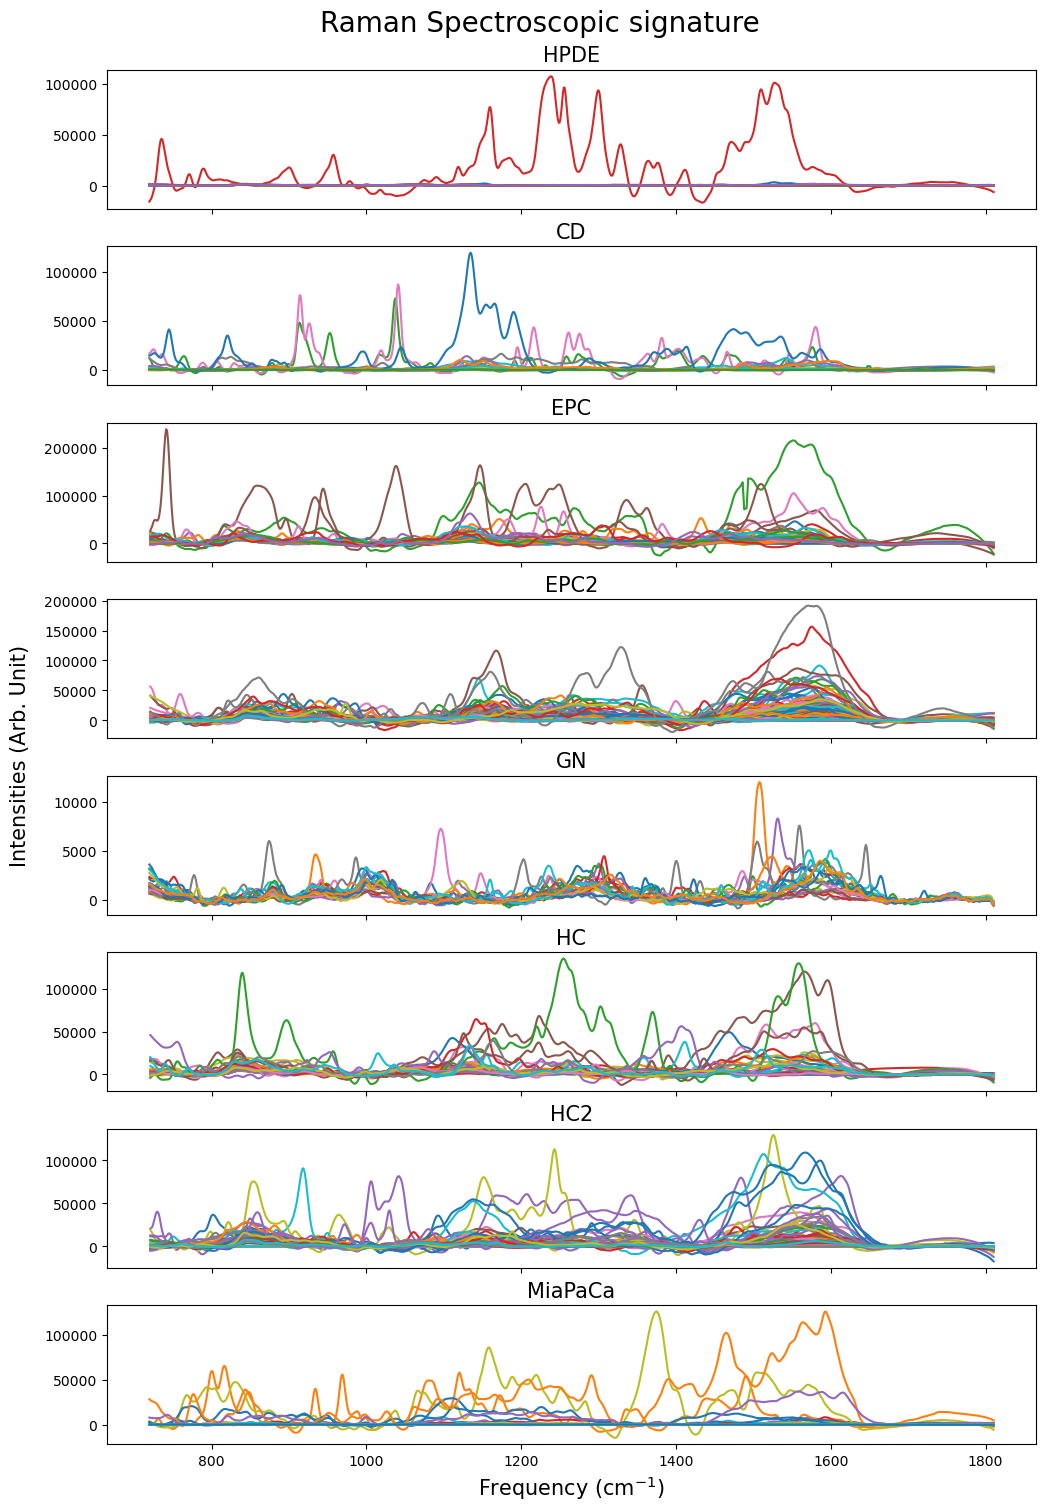

In [75]:
fig, ax = plt.subplots(8,1,sharex=True,sharey=False,layout="constrained")
plt.rcParams['figure.figsize'] = 10, 15
#plt.subplots_adjust(left=0.1, bottom=0.1, right**=**0.9,top=0.9, wspace=0.4,hspace=0.4)
pd.option_context('mode.use_inf_as_na', True)
fig.suptitle('Raman Spectroscopic signature', fontsize = 20)
for i in range(df_raw_HPDE.shape[1]):
    ax[0].plot(df_frequency,df_raw_HPDE.iloc[:,i],label='HPDE')
    ax[0].set_title('HPDE',fontsize=15)
for i in range(df_raw_CD.shape[1]):
    ax[1].plot(df_frequency,df_raw_CD.iloc[:,i],label='CD')
    ax[1].set_title('CD',fontsize=15)
for i in range(df_raw_EPC.shape[1]):
    ax[2].plot(df_frequency[1:],df_raw_EPC.iloc[:,i],label='EPC')
    ax[2].set_title('EPC',fontsize=15)
for i in range(df_raw_EPC2.shape[1]):
    ax[3].plot(df_frequency[1:],df_raw_EPC2.iloc[:,i],label='EPC2')
    ax[3].set_title('EPC2',fontsize=15)
for i in range(df_raw_GN.shape[1]):
    ax[4].plot(df_frequency,df_raw_GN.iloc[:,i],label='GN')
    ax[4].set_title('GN',fontsize=15)
for i in range(df_raw_HC.shape[1]):
    ax[5].plot(df_frequency[1:],df_raw_HC.iloc[:,i],label='HC')
    ax[5].set_title('HC',fontsize=15)
for i in range(df_raw_HC2.shape[1]):
    ax[6].plot(df_frequency[1:],df_raw_HC2.iloc[:,i],label='HC2')
    ax[6].set_title('HC2',fontsize=15)
for i in range(df_raw_MiaPaCa.shape[1]):
    ax[7].plot(df_frequency,df_raw_MiaPaCa.iloc[:,i],label='MiaPaCa')
    ax[7].set_title('MiaPaCa',fontsize=15)

plt.gcf().text(-0.02,0.5, "Intensities (Arb. Unit)", ha="center", va="center", rotation=90, fontsize=15)
plt.xlabel(r'Frequency (cm$^{-1}$)',fontsize=15)
#plt.legend()
#plt.tight_layout()
plt.show()

**Note:** Here, HPDE, CD, MiaPaCa, and GN are exosomes from different cells, which are identified as a marker for pancreatic cancer cells. HC are the cells from healthy control group and EPC are the early pancreatic cancer cell group. 

Here, the author uses Vancouver Raman algorithm to remove flourescence by fitting the polynomial regression. Also, there are modified Vancouver Raman algorithm to denoise, correct baseline (fitting the flourescence), and so on. The author also normalizes the spectra as well. 

In [208]:
df_scaled_CD = pd.read_csv(r'Data\Scaled CD18.txt',sep='\s+',header=None)
df_scaled_CD.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.627240,-0.808440,0.785649,-0.286407,1.117742,1.198693,0.783460,0.269363,-0.011685,-0.814099,...,3.614682,0.793426,5.294379,2.974757,2.181770,3.626305,0.989208,0.081365,-0.699944,5.020930
1,0.544890,-0.803976,0.580486,-0.284544,0.951922,1.171875,0.859946,0.117320,-0.017348,-0.833708,...,3.721372,0.783691,4.771051,2.938056,1.990713,3.608480,1.170498,0.098765,-0.718982,4.903327
2,0.486031,-0.757946,0.422489,-0.289928,0.876549,1.101364,0.934400,0.049795,-0.011968,-0.836117,...,3.828628,0.786220,4.479207,2.888274,1.819568,3.488046,1.335950,0.118705,-0.742587,4.659306
3,0.504072,-0.729041,0.117898,-0.273608,0.795501,1.084714,1.061655,0.024158,-0.046767,-0.853397,...,3.807108,0.793976,4.364357,2.846810,1.569697,3.512828,1.613569,0.161349,-0.757534,4.446844
4,0.497984,-0.714085,-0.109961,-0.283588,0.748358,0.991662,1.127355,-0.111128,-0.060305,-0.851067,...,3.816864,0.805368,4.237218,2.709478,1.374390,3.548538,1.681663,0.193972,-0.781588,4.213111


In [209]:
df_scaled_GN = pd.read_csv(r'Data\Scaled GN.txt',sep='\s+',header=None)
df_scaled_GN.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.605200,0.480491,4.279952,1.537541,0.646067,1.565064,0.839120,0.641616,1.293977,0.680262,...,0.572399,0.810921,3.234632,2.501736,1.417842,0.317277,3.007618,2.281700,1.695935,1.377771
1,1.478035,0.468102,4.243459,1.456568,0.628288,1.634938,0.774027,0.578849,1.094202,0.596664,...,0.433070,0.731839,3.273524,2.075808,1.434043,0.297958,2.835588,2.166988,1.634570,1.294449
2,1.415687,0.435763,4.154088,1.423301,0.610606,1.654515,0.749243,0.543971,0.947084,0.589395,...,0.333233,0.690918,3.198684,1.876833,1.335939,0.234872,2.700803,2.087374,1.518635,1.244289
3,1.373109,0.421543,3.952214,1.404418,0.576885,1.804510,0.695163,0.503187,0.802163,0.486022,...,0.204007,0.645669,3.025929,1.501176,1.282998,0.182967,2.582841,2.002947,1.403997,1.127930
4,1.313476,0.386261,3.738269,1.377033,0.483284,1.800878,0.649300,0.476363,0.584689,0.359211,...,0.091412,0.683105,2.775281,1.237185,1.229074,0.165640,2.418848,1.899299,1.391716,1.023547


In [211]:
df_scaled_HPDE = pd.read_csv(r'Data\Scaled HPDE.txt',sep='\s+',header=None)
df_scaled_HPDE.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2.560051,1.970449,3.037619,3.033875,2.412465,2.823622,3.452165,1.805597,3.296075,2.898464,...,0.594899,2.282256,2.820799,1.766969,1.576723,0.498329,1.124748,1.941478,1.166412,0.235613
1,2.381410,1.883087,2.970336,2.969361,2.388290,2.764960,3.374450,1.744433,3.162275,2.688602,...,0.494378,2.040423,2.688267,1.607042,1.559853,0.518802,1.205917,1.810946,1.136220,0.147063
2,2.329360,1.859549,2.860879,2.925439,2.232922,2.602753,3.234404,1.735840,3.055666,2.616045,...,0.516661,2.055868,2.668853,1.543411,1.580687,0.442381,1.468947,1.828335,1.163990,0.119143
3,2.267373,1.831276,2.774029,2.721611,2.144916,2.443454,3.071123,1.719661,3.071351,2.409292,...,0.384564,1.879769,2.652128,1.545021,1.515992,0.412792,1.663626,1.746537,1.175575,-0.041795
4,2.068860,1.803762,2.625452,2.603190,1.943666,2.354916,3.034961,1.704402,2.961873,2.228518,...,0.312958,1.665659,2.612008,1.684299,1.438083,0.280347,1.668530,1.777790,1.257393,-0.049063


In [212]:
df_scaled_MiaPaCa = pd.read_csv(r'Data\Scaled MiaPaCa.txt',sep='\s+',header=None)
df_scaled_MiaPaCa.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2.279001,-0.493665,-0.837637,-0.675826,-0.654590,0.827089,-0.310579,-0.794842,-0.667363,0.306805,...,0.002890,1.455419,1.612946,-0.048173,3.220945,2.680854,2.322535,-0.178839,-0.795637,1.208965
1,2.224572,-0.546858,-0.902667,-0.705791,-0.653416,0.820007,-0.322965,-0.782919,-0.694757,0.262347,...,-0.034115,1.415905,1.455756,-0.078448,3.162044,2.679886,2.129003,-0.261592,-0.769948,1.266487
2,2.141597,-0.569704,-0.849027,-0.727031,-0.630418,0.755663,-0.278471,-0.759654,-0.716747,0.203500,...,-0.060101,1.349793,1.395624,-0.094257,3.189273,2.543733,2.073219,-0.317903,-0.788373,1.286535
3,2.112681,-0.629354,-0.723450,-0.749285,-0.590760,0.629385,-0.150431,-0.674885,-0.745962,0.133052,...,-0.079730,1.351175,1.323308,-0.112559,3.036901,2.501903,2.012246,-0.280749,-0.877399,1.292390
4,2.010547,-0.641432,-0.771103,-0.759530,-0.568444,0.562125,0.016198,-0.639184,-0.769380,0.051186,...,-0.094101,1.305004,1.281904,-0.115781,3.013851,2.338906,1.941912,-0.317927,-0.825410,1.185780


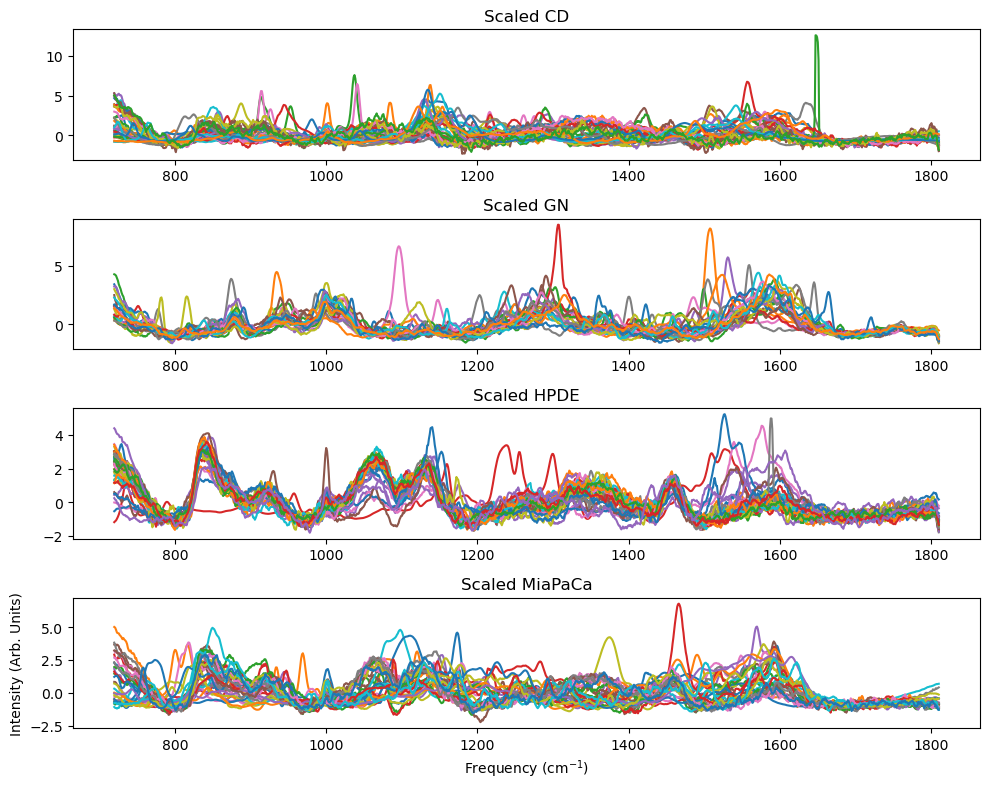

In [214]:
fig, ax = plt.subplots(4,1,figsize=(10,8))
ax[0].plot(df_average.Raman.Frequency, df_scaled_CD[:])
ax[0].set_title('Scaled CD')
ax[1].plot(df_average.Raman.Frequency, df_scaled_GN[:])
ax[1].set_title('Scaled GN')
ax[2].plot(df_average.Raman.Frequency, df_scaled_HPDE[:])
ax[2].set_title('Scaled HPDE')
ax[3].plot(df_average.Raman.Frequency, df_scaled_MiaPaCa[:])
ax[3].set_title('Scaled MiaPaCa')
plt.ylabel('Intensity (Arb. Units)')
plt.xlabel('Frequency (cm$^{-1}$)')
plt.tight_layout()
plt.show()

It appears that the spectra do not need much cleaning from here. We will use the scaled spectra to move forward and reduce the dimension by applying PCA. However, we might need to create a label and concatenate all of the spectra of different cells. 

In [219]:
df = pd.concat([df_scaled_CD,df_scaled_GN,df_scaled_HPDE,df_scaled_MiaPaCa],axis=1).T.reset_index()
df.drop('index',axis=1,inplace=True)
df.head(200)

,0,1,2,3,4,5,6,7,8,9,...,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013
0,0.627240,0.544890,0.486031,0.504072,0.497984,0.211190,0.085117,-0.011104,-0.244996,-0.269232,...,0.224013,0.234435,0.293614,0.287794,0.218139,0.202670,0.143649,-0.188851,-0.338167,-0.343832
1,-0.808440,-0.803976,-0.757946,-0.729041,-0.714085,-0.695870,-0.695353,-0.768268,-0.823698,-0.867106,...,-0.433096,-0.429063,-0.413083,-0.404201,-0.431803,-0.452528,-0.496689,-0.571386,-0.594077,-0.610955
2,0.785649,0.580486,0.422489,0.117898,-0.109961,-0.257283,-0.344626,-0.403054,-0.445152,-0.461131,...,-0.616194,-0.624187,-0.628112,-0.636051,-0.642628,-0.646459,-0.653747,-0.673928,-0.681869,-0.695268
3,-0.286407,-0.284544,-0.289928,-0.273608,-0.283588,-0.281549,-0.298788,-0.296297,-0.344452,-0.392090,...,0.203654,0.202230,0.179256,0.182211,0.202127,0.219839,0.230545,0.105348,0.095563,0.021590
4,1.117742,0.951922,0.876549,0.795501,0.748358,0.596884,0.605710,0.579334,0.585846,0.485756,...,-0.643646,-0.673613,-0.711815,-0.719791,-0.655058,-0.607814,-0.677480,-0.896293,-0.905580,-1.059267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2.680854,2.679886,2.543733,2.501903,2.338906,2.202445,2.012167,2.038291,2.055618,2.057747,...,-1.102735,-1.038924,-0.871064,-0.831789,-0.792699,-0.814054,-0.847574,-1.017860,-1.033726,-1.074580
117,2.322535,2.129003,2.073219,2.012246,1.941912,1.800809,1.691090,1.653938,1.576651,1.452387,...,-0.846075,-0.815540,-0.797810,-0.699646,-0.699399,-0.792807,-0.673847,-0.840130,-0.843650,-0.801993
118,-0.178839,-0.261592,-0.317903,-0.280749,-0.317927,-0.421874,-0.358944,-0.403064,-0.504370,-0.726259,...,-0.432744,-0.429636,-0.443264,-0.500121,-0.559249,-0.489456,-0.431647,-0.500564,-0.501574,-0.445481
119,-0.795637,-0.769948,-0.788373,-0.877399,-0.825410,-0.803173,-0.862064,-0.846209,-0.797101,-0.837419,...,-0.747460,-0.768990,-0.643993,-0.655699,-0.694486,-0.677776,-0.715158,-1.061388,-1.113616,-1.302723


In [220]:
df.isna().sum().sum()

0

In [234]:
from sklearn.decomposition import PCA
pca_df = PCA().fit(df)

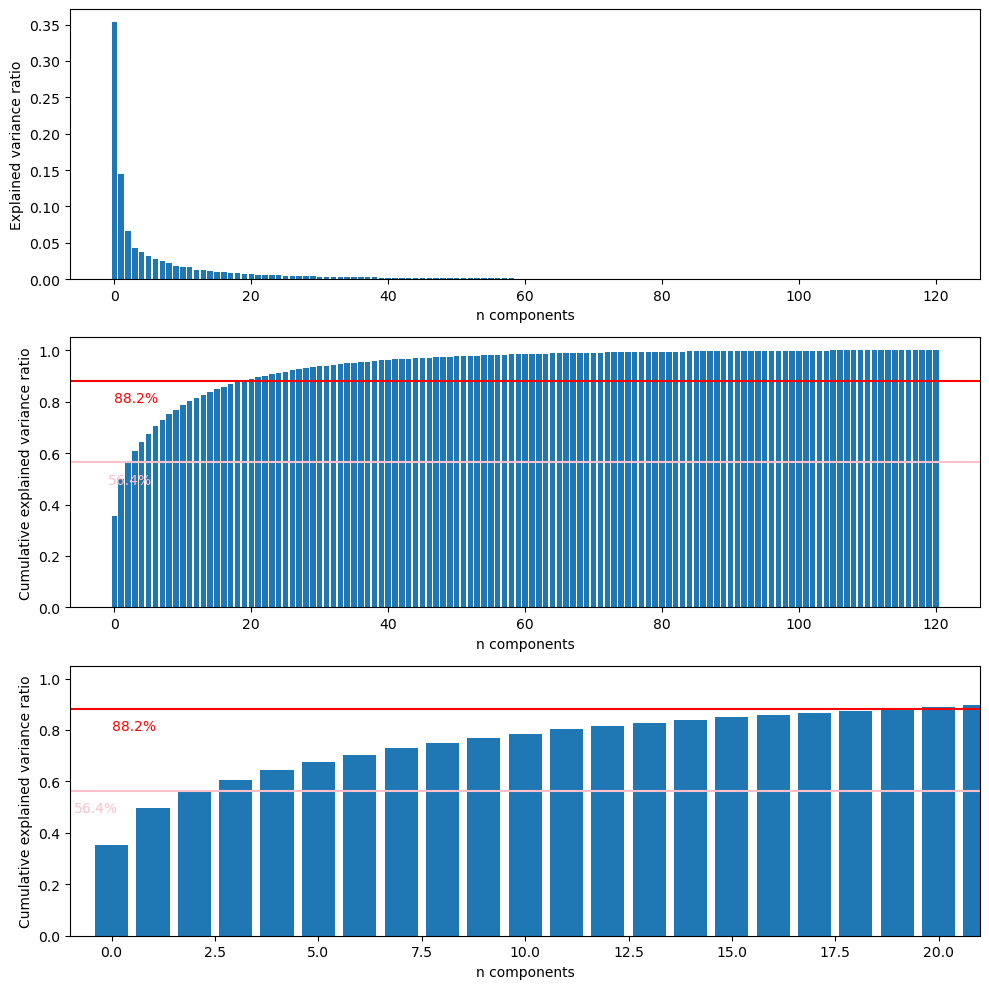

In [235]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
ax[0].bar(range(len(pca_df.explained_variance_ratio_)),pca_df.explained_variance_ratio_)
ax[1].bar(range(len(pca_df.explained_variance_ratio_)),pca_df.explained_variance_ratio_.cumsum())
ax[0].set_xlabel('n components')
ax[0].set_ylabel('Explained variance ratio')
ax[1].set_xlabel('n components')
ax[1].set_ylabel('Cumulative explained variance ratio')
ax[1].axhline(0.882,c='r')
ax[1].text(0,0.8,'88.2%',c='r')
ax[1].axhline(0.564,c='pink')
ax[1].text(-0.9,0.48,'56.4%',c='pink')

ax[2].bar(range(len(pca_df.explained_variance_ratio_)),pca_df.explained_variance_ratio_.cumsum())
ax[2].set_xlabel('n components')
ax[2].set_ylabel('Cumulative explained variance ratio')
ax[2].axhline(0.882,c='r')
ax[2].text(0,0.8,'88.2%',c='r')
ax[2].axhline(0.564,c='pink')
ax[2].text(-0.9,0.48,'56.4%',c='pink')
ax[2].set_xlim(-1,21)
plt.tight_layout()
plt.show()

This PCA fitting and explained variance ratio results verifies the author's results as well. The first three of PC explains 56.4% of the total variance and 20 PCs explains 88.2% of the total variance. 

In [242]:
cd_obs = df_scaled_CD.shape[1]
GN_obs = df_scaled_GN.shape[1]
HPDE_obs = df_scaled_HPDE.shape[1]
MiaPaCa_obs = df_scaled_MiaPaCa.shape[1]
y = []
for i in range(cd_obs):
    y.append(0)
for i in range(GN_obs):
    y.append(1)
for i in range(HPDE_obs):
    y.append(2)
for i in range(MiaPaCa_obs):
    y.append(3)
y = np.array(y)
y.shape

(121,)

In [243]:
X = pca_df.transform(df)